---
## Notebook 5: Putting It All Together - Mini Challenge

Now it's your turn! Complete the following challenges to test your understanding:

### Challenge 1: Data Analysis
1. Load the weather.json file
2. Calculate the "comfort index" as: `comfort = temperature * (100 - humidity) / wind_speed`
3. Find which city has the highest comfort index
4. Create a visualisation showing comfort index by city

### Challenge 2: Image Processing
1. Load the pattern.png image
2. Create a version with only blue and green channels (no red)
3. Normalise it to [0, 1]
4. Display the original and modified images side by side

### Challenge 3: Sklearn Practice
1. Using the students data, predict `attendance` from `math_score` and `science_score`
2. Split the data 70/30 train/test
3. Train a model and calculate the R² score
4. Visualise predicted vs actual attendance

In [16]:
# Housekeeping Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score

### Challenge 1: Data Analysis

In [4]:
# Load weather.json
weather_df = pd.read_json("weather.json")

print(weather_df)

       city  temperature  humidity  wind_speed  rainfall_mm
0  Limerick         12.5        82        15.2          2.3
1    Galway         11.8        85        18.5          3.1
2    Dublin         13.2        78        12.3          1.8
3      Cork         13.8        80        14.1          2.0
4   Belfast         10.9        88        20.3          3.8


In [5]:
# Calculate "Comfort Index" = temperature * (100 - humidity) / wind_speed
weather_df['comfort_idx'] = weather_df['temperature'] * (100 - weather_df['humidity']) / weather_df['wind_speed']

print(weather_df)

       city  temperature  humidity  wind_speed  rainfall_mm  comfort_idx
0  Limerick         12.5        82        15.2          2.3    14.802632
1    Galway         11.8        85        18.5          3.1     9.567568
2    Dublin         13.2        78        12.3          1.8    23.609756
3      Cork         13.8        80        14.1          2.0    19.574468
4   Belfast         10.9        88        20.3          3.8     6.443350


In [6]:
# Find the city with highest "Comfort Index"
idx = weather_df['comfort_idx'].idxmax()
highest_comfortIndex = weather_df.loc[idx, 'city']
print("City with the highest comfort index is: ", highest_comfortIndex)

City with the highest comfort index is:  Dublin


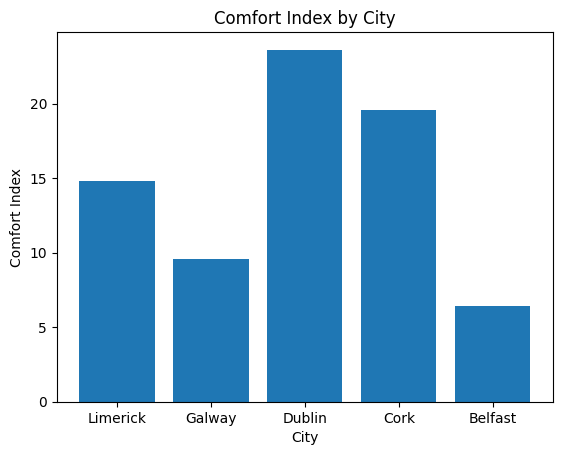

In [7]:
# Create a visualisation showing comfort by city
# Use .bar to create a bar chart, select data frame columns, x,y
plt.bar(weather_df['city'], weather_df['comfort_idx'])

# Labels and title
plt.xlabel('City')
plt.ylabel('Comfort Index')
plt.title('Comfort Index by City')

plt.show()

### Challenge 2: Image Processing

In [11]:
# Load the pattern.png image
img = np.array(Image.open("pattern.png"))


In [13]:
# Remove Red Channel
red_removed = img.copy()
red_removed[:, :, 0] = 0

In [14]:
# Normalise it to [0, 1]
img_normalised = red_removed / 255.0

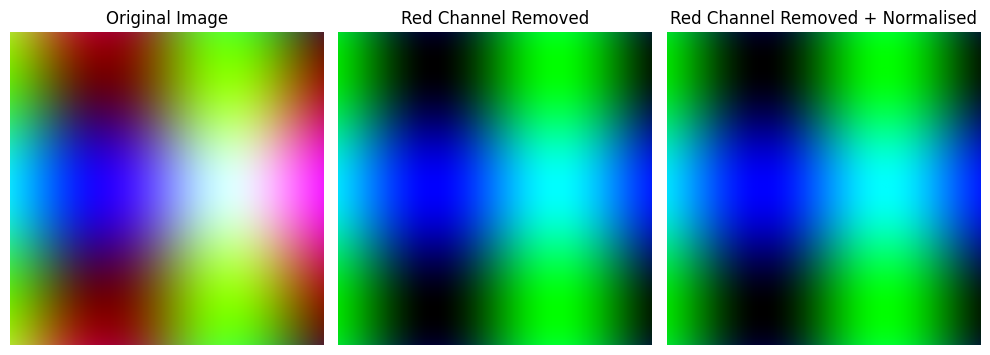

In [15]:
# Show Both Images side by side
figs, axes = plt.subplots(1, 3, figsize=(10,5))

axes[0].imshow(img)
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(red_removed)
axes[1].set_title("Red Channel Removed")
axes[1].axis("off")

axes[2].imshow(img_normalised)
axes[2].set_title("Red Channel Removed + Normalised")
axes[2].axis("off")

plt.tight_layout()
plt.show()

### Challenge 3: Sklearn Practice

In [ ]:
# Predict Attendance from 'math_score' and 'science_score'

# Load Data
student_df = pd.read_csv("students.csv")

# X is inputs
X = student_df[['math_score', 'science_score']]

# Y is what we want to predict
y = student_df['attendance']

Feature matrix shape: (10, 2)
Target vector shape: (10,)


In [19]:
# Split the data 70/30 train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [25]:
# Train a model and calc the R^2 score
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

R² Score: 0.4983


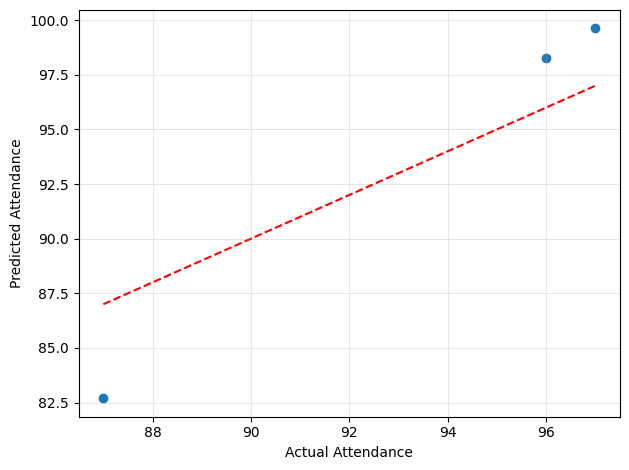

In [27]:
# Visualise predicted vs actual attendance
test_results = X_test.copy()
test_results['Actual Attendance'] = y_test.values
test_results['Predicted Attendance'] = y_pred

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Attendance')
plt.ylabel('Predicted Attendance')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect prediction line
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
